In [1]:
import pandas as pd
import numpy as np
!pip install pandas numpy openpyxl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

Defaulting to user installation because normal site-packages is not writeable


# Q1 - 3 - Purchase Data

In [16]:
file_path = 'Lab Session Data.xlsx'
df = pd.read_excel(file_path, sheet_name='Purchase data')

print("The original dataframe: ")
print(df.head())

# filtering out the unwanted columns, storing selected columns into df
df = df[['Customer', 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']]

print("\nThe filtered dataframe: ")
print(df.head())

# getting a list of the column names
print("\nThe columns of df: ")
print(df.columns.values.tolist())

# storing selected columns into matrix A
A = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]

# storing the last column into matrix C
C = df[['Payment (Rs)']]

print("\nThe matrices are: ")
print("A = ",A)
print("\nC = ",C)

# the dimensionality of the vector space for this data
def dimensionality(A):
    return A.shape[1]    # A.shape[1] - for number of columns

# Number of vectors existing in this vector space
def no_of_vectors(A):
    return A.shape[0]   # A.shape[0] - for number of rows

# rank of Matrix A
def rank(A):
    return np.linalg.matrix_rank(A)  # linalg - linear algebra

# Using Pseudo-Inverse to find the cost of each product available for sale. 
def Pseudo_Inverse(A):
    return np.linalg.pinv(A)

# Usin the Pseudo-inverse to calculate the model vector X for predicting the cost of the products available with the vendor.
def predicting_the_cost(A):
    A_pseudo_inv = Pseudo_Inverse(A)
    return A_pseudo_inv @ C         # "@" to multiply matrices

print("\nPredicting the cost of the products available with the vendor:\n", predicting_the_cost(A))

# A3. Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on purchase behavior
def compute_labels(C):
    return np.where(C > 200, 'RICH', 'POOR').flatten()

def classifier_model():
    y = compute_labels(C)
    X = A   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
      
    y_pred = model.predict(X_test)
      
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred, zero_division=0))
   
    print("\nAccuracy Score:")
    print(accuracy_score(y_test, y_pred))

def main():
    # A1
    print(f"\nDimensionality of the vector space is: {dimensionality(A)}")
    print(f"\nNumber of vectors is: {no_of_vectors(A)}")
    print(f"\nRank of Matrix A: {rank(A)}")
    
    # A2
    print("\nCost of each product:")
    print(Pseudo_Inverse(A))
    
    # A3
    classifier_model()
    
if __name__ == "__main__":
    main()

The original dataframe: 
  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
0         NaN         NaN         NaN         NaN         NaN  ...   
1         NaN         NaN         NaN         NaN         NaN  ...   
2         NaN         NaN         NaN         NaN         NaN  ...   
3         NaN         NaN         NaN         NaN         NaN  ...   
4         NaN         NaN         NaN         NaN         NaN  ...   

   Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  \
0          NaN          NaN          NaN     

# Q4 - IRCTC Stock Price

Mean = 1560.6634538152612
Variance = 58732.36535253922
Wednesday mean = 1550.7060000000001
Population mean = 1560.6634538152612
Observation: The sample mean is lower than the population mean.
April mean = 1698.9526315789474
Population mean = 1560.6634538152612
Observation: The sample mean is higher than the population mean.
Probability of making a loss: 0.50
Probability of making a profit on Wednesday: 0.42
Conditional probability of making profit given it's Wednesday: 0.84


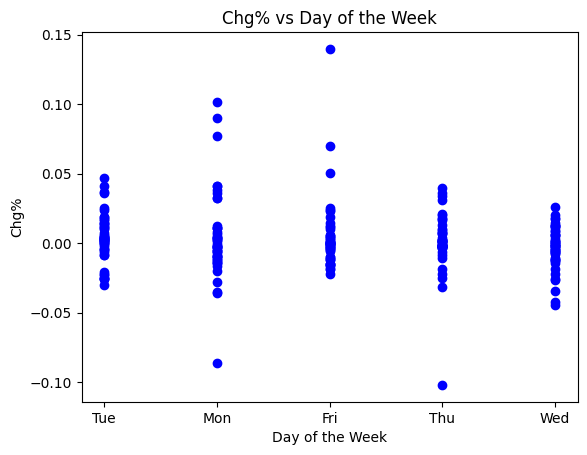

In [18]:
file_path = 'Lab Session Data.xlsx'
df = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')

def calculate_mean_and_variance(df):
    # Calculate mean and variance of the 'Price' column
    mean = df['Price'].mean()
    variance = df['Price'].var()
    return mean, variance

def filter_data_by_day(df, day):
    # Filter data by specific day
    return df[df['Day'] == day]

def calculate_sample_mean(df, column):
    # Calculate mean of a specific column
    return df[column].mean()

def compare_means(sample_mean, population_mean):
    # Compare sample mean with population mean and return observation
    if sample_mean > population_mean:
        return "The sample mean is higher than the population mean."
    elif sample_mean < population_mean:
        return "The sample mean is lower than the population mean."
    else:
        return "The sample mean is equal to the population mean."

def filter_data_by_month(df, month):
    # Filter data by specific month
    return df[df['Month'] == month]

def calculate_probability_of_loss(df, column):
    # Calculate the probability of making a loss over the stock
    negative_changes = df[column].apply(lambda x: x < 0)
    return negative_changes.mean()

def calculate_probability_of_profit(df, day, column):
    # Calculate the probability of making a profit on a specific day
    day_data = filter_data_by_day(df, day)
    return ((day_data[column] > 0).sum()) / len(day_data)

def calculate_conditional_probability(df, day, column):
    # Calculate conditional probability of making profit given today is a specific day
    overall_profit_probability = len(df[df[column] > 0]) / len(df)
    day_profit_probability = calculate_probability_of_profit(df, day, column)
    return day_profit_probability / overall_profit_probability

def plot_scatter(df, x_column, y_column, title, xlabel, ylabel):
    # Make a scatter plot
    plt.scatter(df[x_column], df[y_column], color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Main program
def main():
    mean, variance = calculate_mean_and_variance(df)
    print('Mean =', mean)
    print('Variance =', variance)
    
    wednesday_df = filter_data_by_day(df, 'Wed')
    wednesday_mean = calculate_sample_mean(wednesday_df, 'Price')
    print('Wednesday mean =', wednesday_mean)
    print('Population mean =', mean)
    print('Observation:', compare_means(wednesday_mean, mean))
    
    april_df = filter_data_by_month(df, 'Apr')
    april_mean = calculate_sample_mean(april_df, 'Price')
    print('April mean =', april_mean)
    print('Population mean =', mean)
    print('Observation:', compare_means(april_mean, mean))
    
    probability_of_loss = calculate_probability_of_loss(df, 'Chg%')
    print(f"Probability of making a loss: {probability_of_loss:.2f}")
    
    wed_profit_probability = calculate_probability_of_profit(df, 'Wed', 'Chg%')
    print(f"Probability of making a profit on Wednesday: {wed_profit_probability:.2f}")
    
    conditional_profit_probability = calculate_conditional_probability(df, 'Wed', 'Chg%')
    print(f"Conditional probability of making profit given it's Wednesday: {conditional_profit_probability:.2f}")
    
    plot_scatter(df, 'Day', 'Chg%', 'Chg% vs Day of the Week', 'Day of the Week', 'Chg%')

if __name__ == "__main__":
    main()

# Q 5-10 - thyroid0387_UCI

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Record ID                  9172 non-null   int64 
 1   age                        9172 non-null   int64 
 2   sex                        9172 non-null   object
 3   on thyroxine               9172 non-null   object
 4   query on thyroxine         9172 non-null   object
 5   on antithyroid medication  9172 non-null   object
 6   sick                       9172 non-null   object
 7   pregnant                   9172 non-null   object
 8   thyroid surgery            9172 non-null   object
 9   I131 treatment             9172 non-null   object
 10  query hypothyroid          9172 non-null   object
 11  query hyperthyroid         9172 non-null   object
 12  lithium                    9172 non-null   object
 13  goitre                     9172 non-null   object
 14  tumor   

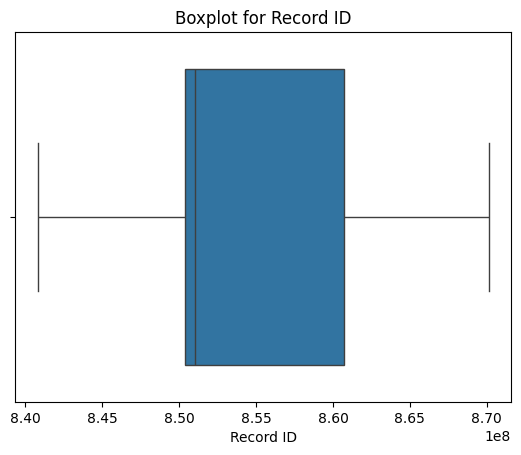

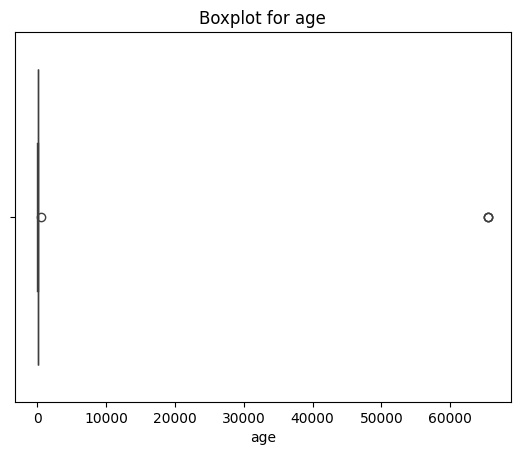

C:\Users\Sneha\AppData\Local\Temp\ipykernel_31864\3172693529.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


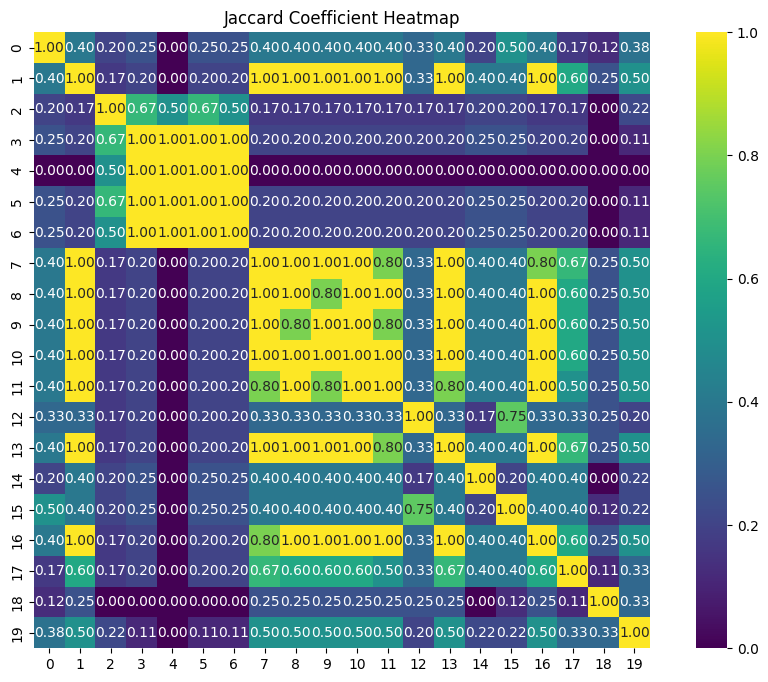

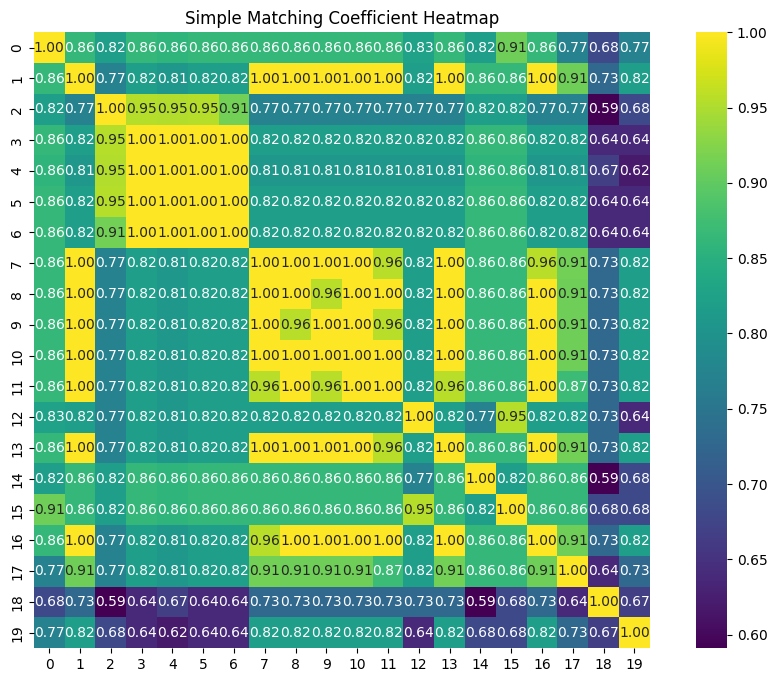

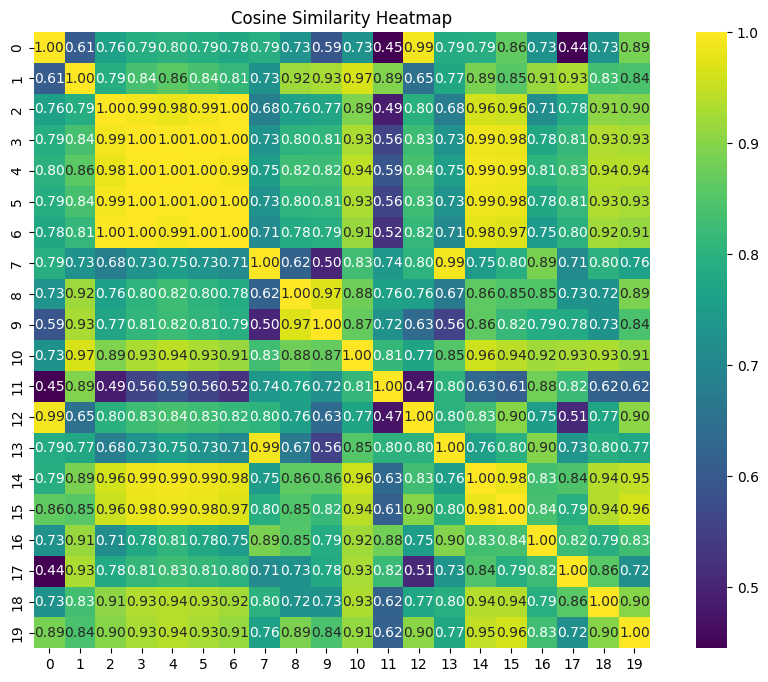

In [22]:
# A5. Data Exploration
def explore_data(df):
    # Display basic information
    info = df.info()
    description = df.describe(include='all')
    
    # Identify data types of attributes
    data_types = df.dtypes
    
    # Identify missing values
    missing_values = df.isnull().sum()
    
    # Identify numeric columns and their range
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    numeric_range = df[numeric_columns].describe()
    
    return info, description, data_types, missing_values, numeric_columns, numeric_range

def detect_outliers(df, numeric_columns):
    # Check for outliers in numeric columns
    outliers = {}
    for column in numeric_columns:
        plt.figure()
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column}')
        plt.show()
        outliers[column] = df[column][(df[column] > df[column].mean() + 3 * df[column].std()) |
                                      (df[column] < df[column].mean() - 3 * df[column].std())]
    return outliers

def calculate_statistics(df, numeric_columns):
    # Calculate mean and variance for numeric variables
    mean_variance = df[numeric_columns].agg(['mean', 'var'])
    return mean_variance

# A6. Data Imputation
def impute_missing_values(df, numeric_columns):
    # Impute missing values based on rules
    for column in numeric_columns:
        if df[column].isnull().any():
            if any(df[column] > df[column].mean() + 3 * df[column].std()) or any(df[column] < df[column].mean() - 3 * df[column].std()):
                df[column].fillna(df[column].median(), inplace=True)
            else:
                df[column].fillna(df[column].mean(), inplace=True)
    
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        df[column].fillna(df[column].mode()[0], inplace=True)

# A7. Data Normalization / Scaling
def normalize_data(df, numeric_columns):
    # Normalize numeric columns
    scaler = StandardScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    return df

# A8. Similarity Measure
def calculate_jc_smc(df, binary_columns):
    # Calculate JC and SMC for binary attributes
    obs1_binary = df.loc[0, binary_columns].apply(lambda x: 1 if str(x).lower() == 't' else 0)
    obs2_binary = df.loc[1, binary_columns].apply(lambda x: 1 if str(x).lower() == 't' else 0)
    
    f11 = np.sum((obs1_binary == 1) & (obs2_binary == 1))
    f00 = np.sum((obs1_binary == 0) & (obs2_binary == 0))
    f01 = np.sum((obs1_binary == 0) & (obs2_binary == 1))
    f10 = np.sum((obs1_binary == 1) & (obs2_binary == 0))

    jc = f11 / (f01 + f10 + f11) if (f01 + f10 + f11) != 0 else np.nan
    smc = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) != 0 else np.nan

    return jc, smc

# A9. Cosine Similarity Measure
def calculate_cosine_similarity(df):
    # Calculate cosine similarity between two observations
    df_preprocessed = df.copy()
    for column in df_preprocessed.columns:
        if df_preprocessed[column].dtype == 'object':
            le = LabelEncoder()
            df_preprocessed[column] = le.fit_transform(df_preprocessed[column].astype(str))

    df_preprocessed.fillna(0, inplace=True)

    obs1_complete = df_preprocessed.iloc[0].values.reshape(1, -1)
    obs2_complete = df_preprocessed.iloc[1].values.reshape(1, -1)

    cosine_sim = cosine_similarity(obs1_complete, obs2_complete)[0][0]
    return cosine_sim

# A10. Heatmap Plot
def plot_heatmaps(df):
    # Plot heatmaps for JC, SMC, and Cosine Similarity
    df_20 = df.head(20)
    df_20_binary = df_20.copy()
    for column in df_20_binary.columns:
        if df_20_binary[column].dtype == 'object':
            le = LabelEncoder()
            df_20_binary[column] = le.fit_transform(df_20_binary[column].astype(str))
    
    df_20_binary.fillna(0, inplace=True)

    def calculate_similarity_matrix(df_binary, similarity_type='JC'):
        n = df_binary.shape[0]
        similarity_matrix = np.zeros((n, n))
        
        for i in range(n):
            for j in range(i, n):
                obs1_binary = df_binary.iloc[i].values
                obs2_binary = df_binary.iloc[j].values
                
                f11 = np.sum((obs1_binary == 1) & (obs2_binary == 1))
                f00 = np.sum((obs1_binary == 0) & (obs2_binary == 0))
                f01 = np.sum((obs1_binary == 0) & (obs2_binary == 1))
                f10 = np.sum((obs1_binary == 1) & (obs2_binary == 0))
                
                if similarity_type == 'JC':
                    denominator = (f01 + f10 + f11)
                    similarity = f11 / denominator if denominator != 0 else np.nan
                elif similarity_type == 'SMC':
                    denominator = (f00 + f01 + f10 + f11)
                    similarity = (f11 + f00) / denominator if denominator != 0 else np.nan
                else:
                    raise ValueError("Unsupported similarity type")
                
                similarity_matrix[i, j] = similarity
                similarity_matrix[j, i] = similarity  # Symmetric matrix
        
        return similarity_matrix

    jc_matrix = calculate_similarity_matrix(df_20_binary, similarity_type='JC')
    smc_matrix = calculate_similarity_matrix(df_20_binary, similarity_type='SMC')

    def calculate_cosine_similarity_matrix(df):
        n = df.shape[0]
        cosine_matrix = np.zeros((n, n))
        
        for i in range(n):
            for j in range(i, n):
                obs1 = df.iloc[i].values.reshape(1, -1)
                obs2 = df.iloc[j].values.reshape(1, -1)
                cosine_sim = cosine_similarity(obs1, obs2)[0][0]
                cosine_matrix[i, j] = cosine_sim
                cosine_matrix[j, i] = cosine_sim  # Symmetric matrix
        
        return cosine_matrix

    cosine_matrix = calculate_cosine_similarity_matrix(df_20_binary)

    # Plot heatmaps
    plt.figure(figsize=(12, 8))
    sns.heatmap(jc_matrix, annot=True, cmap='viridis', cbar=True, square=True, fmt='.2f')
    plt.title('Jaccard Coefficient Heatmap')
    plt.show()

    plt.figure(figsize=(12, 8))
    sns.heatmap(smc_matrix, annot=True, cmap='viridis', cbar=True, square=True, fmt='.2f')
    plt.title('Simple Matching Coefficient Heatmap')
    plt.show()

    plt.figure(figsize=(12, 8))
    sns.heatmap(cosine_matrix, annot=True, cmap='viridis', cbar=True, square=True, fmt='.2f')
    plt.title('Cosine Similarity Heatmap')
    plt.show()

# Main Program
def main():
    # Load dataset
    file_path = r'Lab Session Data.xlsx'
    df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
    info, description, data_types, missing_values, numeric_columns, numeric_range = explore_data(df)
    outliers = detect_outliers(df, numeric_columns)
    mean_variance = calculate_statistics(df, numeric_columns)
    impute_missing_values(df, numeric_columns)
    df = normalize_data(df, numeric_columns)
    
    binary_columns = ['on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 
                      'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 
                      'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured']
    
    jc, smc = calculate_jc_smc(df, binary_columns)
    cosine_sim = calculate_cosine_similarity(df)
    plot_heatmaps(df)

if __name__ == "__main__":
    main()